<a href="https://colab.research.google.com/github/MouadGhouti/CS313_Project/blob/main/CS313_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# @title Importing necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

#loading the data set into a data frame and extracting information from the data frame
df = pd.read_csv('online_shoppers_intention.csv')

# Exploratory Data Analysis (EDA)


In [9]:
#Prining the Dataset
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [10]:
#Printing general statistics about the dataset
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [11]:
#check for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
#Check the ratio between purchased and not purchased
print(f"Percentage of people who did not purchase {round(df['Revenue'].value_counts()[0]/len(df) * 100 , 2)}%")
print(f"Percentage of people who purchased {round(df['Revenue'].value_counts()[1]/len(df) * 100 , 2)}%")


Percentage of people who did not purchase 84.53%
Percentage of people who purchased 15.47%


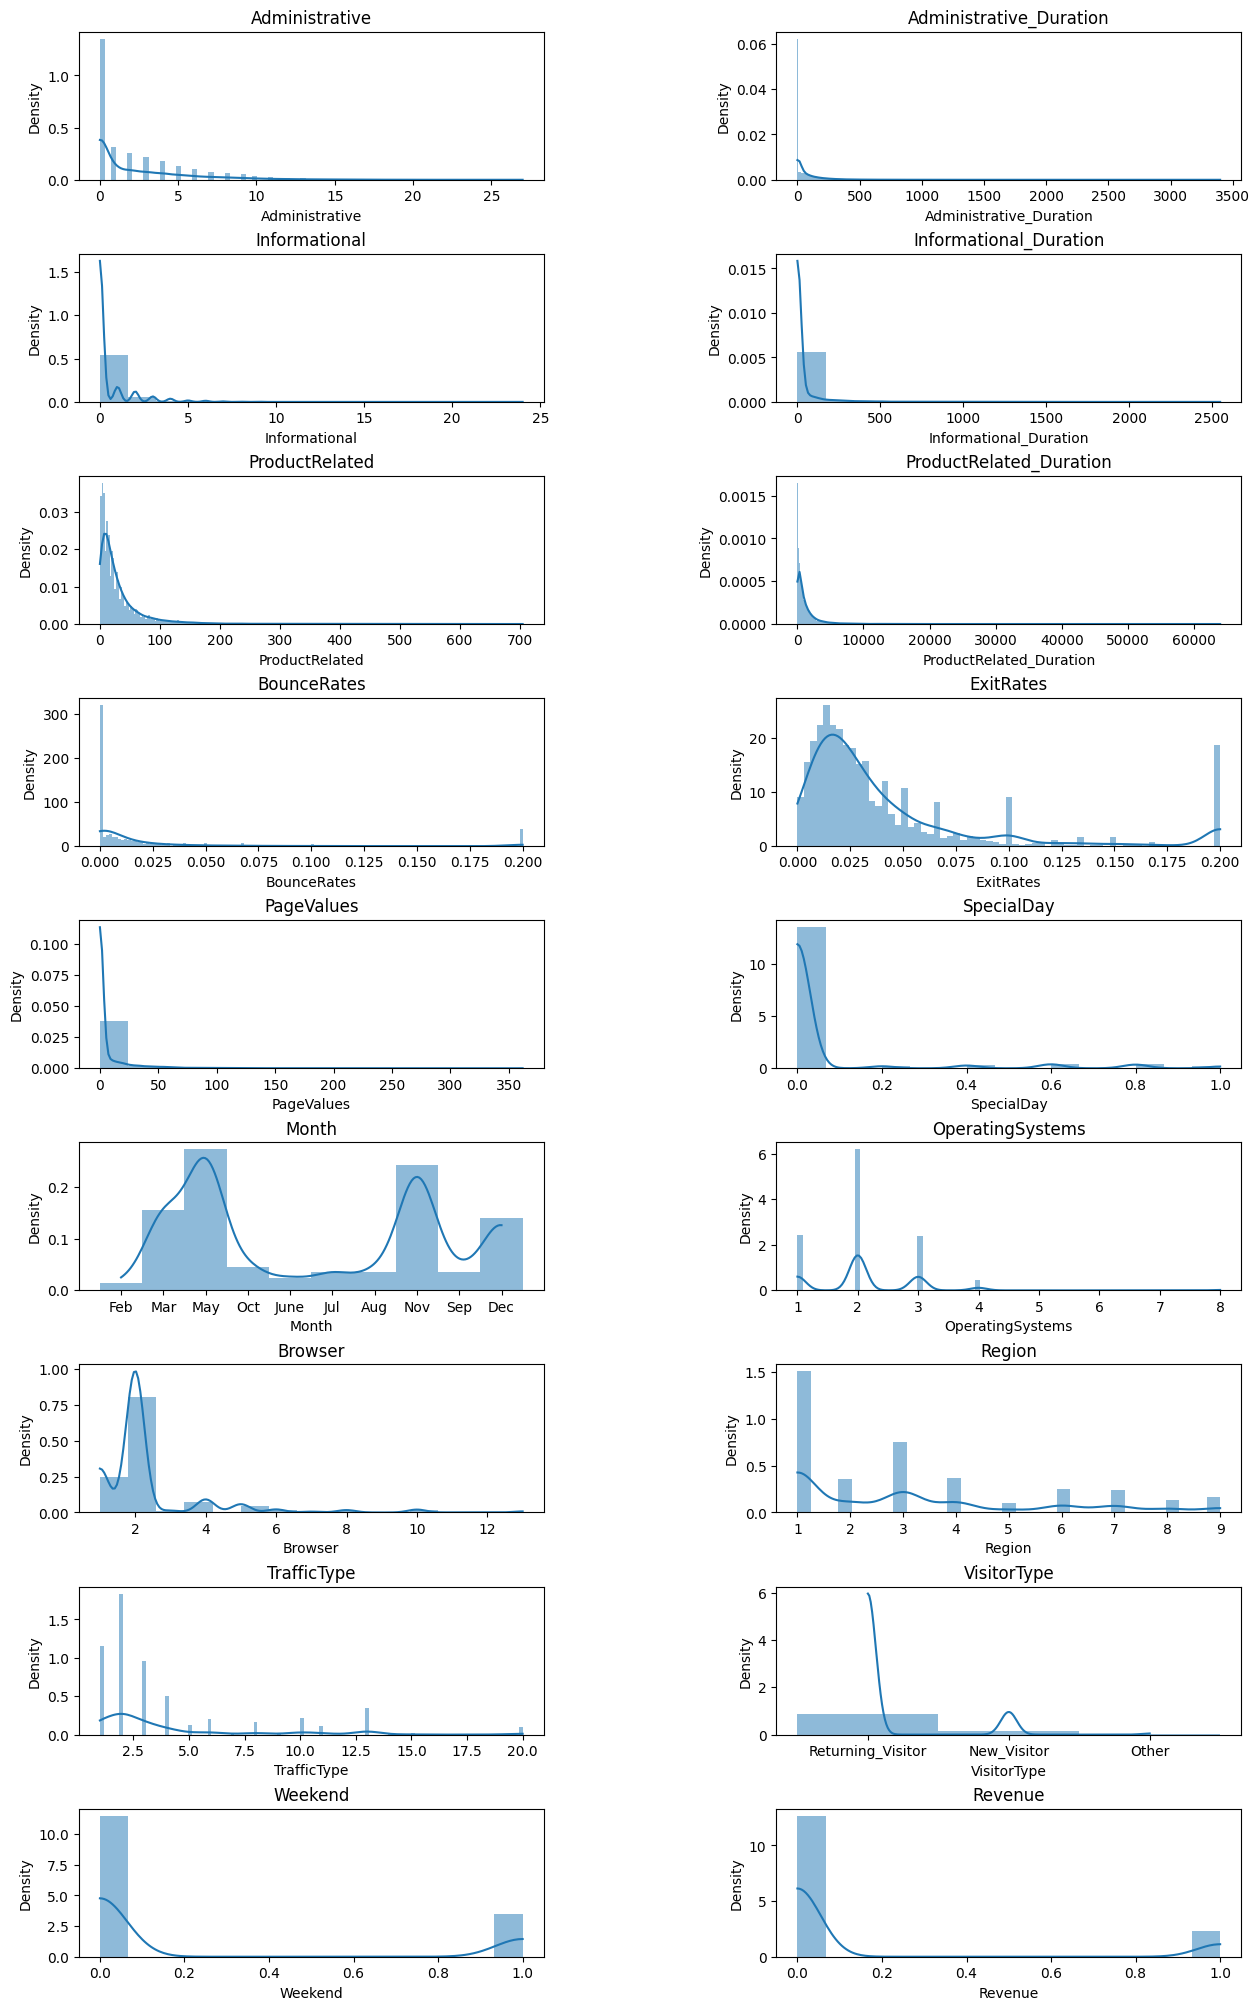

In [13]:
#@title Create features distribution plots
columns_to_plot = df.columns.tolist()
col_num = 2
row_num = 9
fig, axes = plt.subplots(row_num, col_num, figsize=(15, 25))
for i, col in enumerate(columns_to_plot):
    row = i // col_num #example if we are at the 6th feature row = 6/2 = 3
    col_n = i % col_num #example if we are at the 6th feature row = 6%2 = 0
    sns.histplot(df[col],  kde=True, stat="density", linewidth=0, ax=axes[row, col_n])
    axes[row, col_n].set_title(col)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [14]:
#@title encoding and normalizing
#Encode the 'VisitorType' column
label_encoder = LabelEncoder()
df['VisitorType_LabelEncoded'] = label_encoder.fit_transform(df['VisitorType'])
#Encode  the 'Revenue' column
df['Revenue_LabelEncoded'] = label_encoder.fit_transform(df['Revenue'])
#Encode  the 'Month' column
df['Month_LabelEncoded']  = label_encoder.fit_transform(df['Month'])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,VisitorType_LabelEncoded,Revenue_LabelEncoded,Month_LabelEncoded
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,2,0,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,2,0,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,2,0,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,2,0,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,2,0,2


In [15]:
#@title Creating feature and target vectors
features = df[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration', 'VisitorType_LabelEncoded','Month_LabelEncoded','BounceRates','ExitRates']]
target = df[['Revenue_LabelEncoded']]

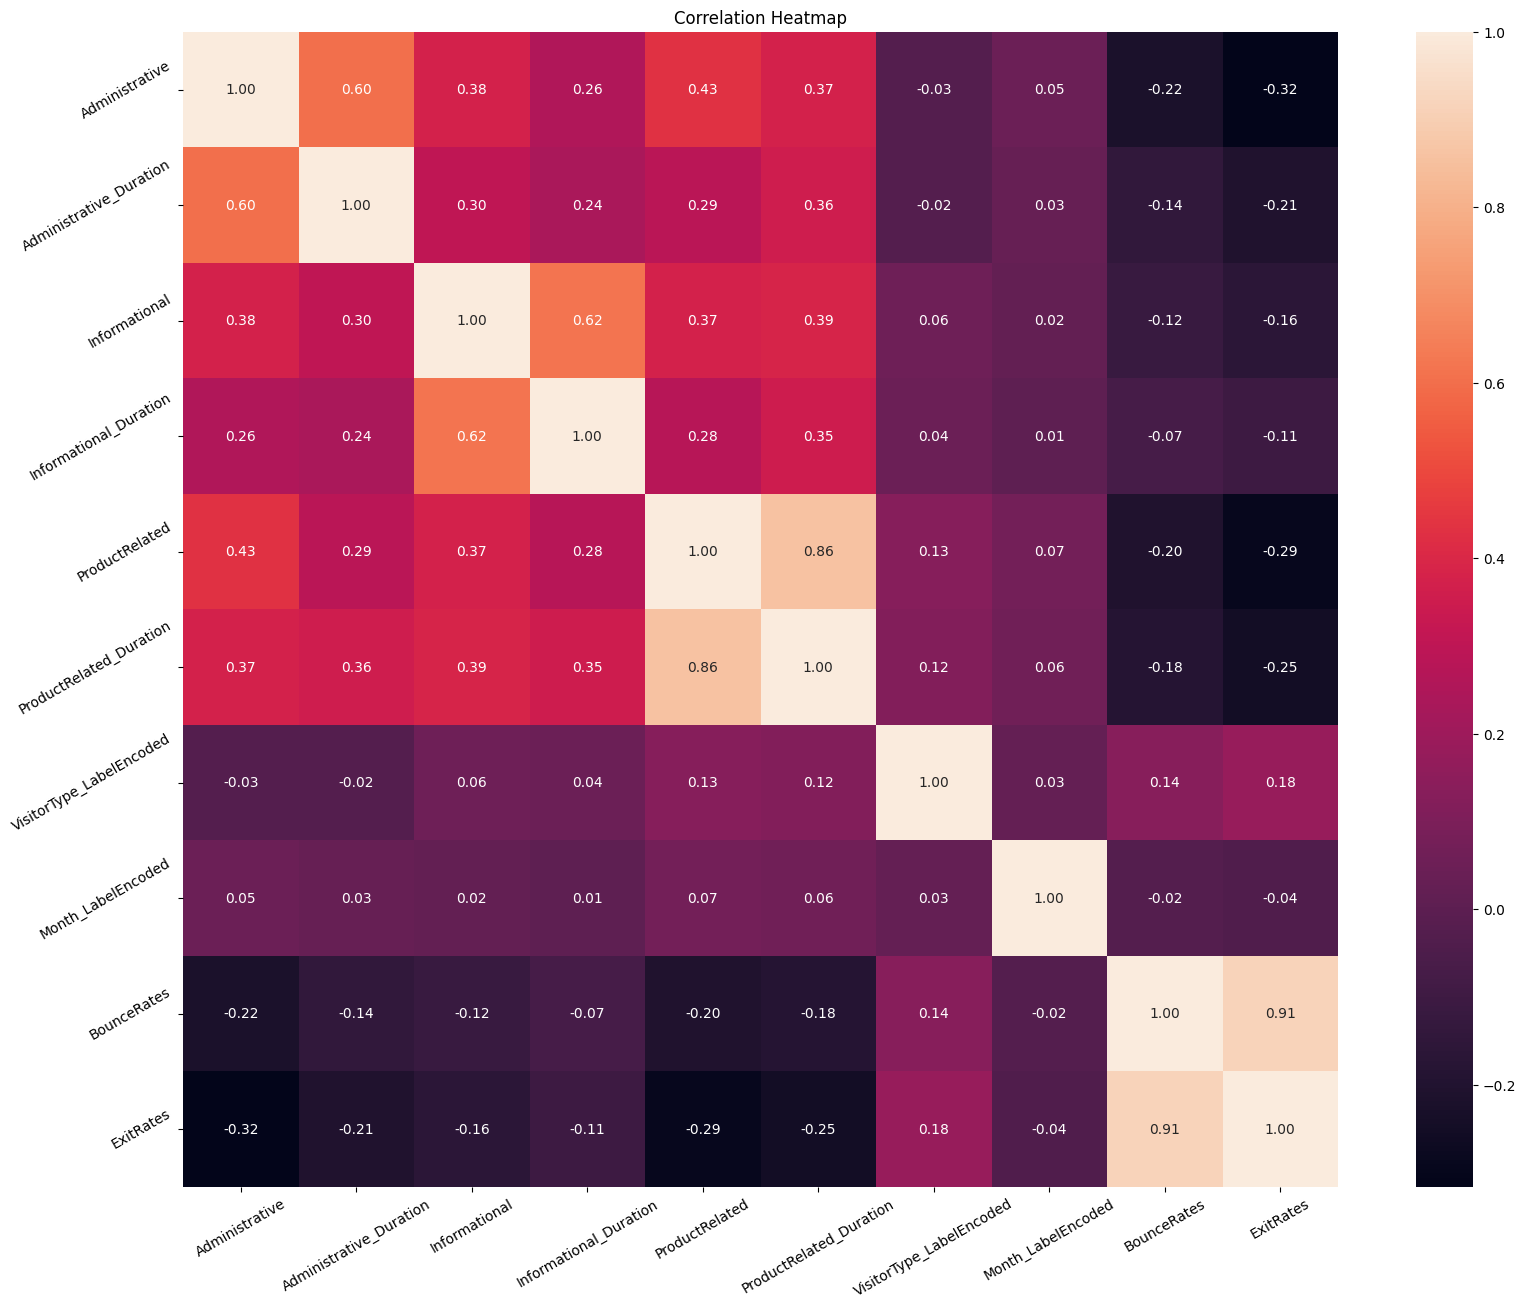

In [16]:
corr_matrix_full = features.corr()
# Create correlation heatmap
plt.figure(figsize=(20,15))
plt.title('Correlation Heatmap')
a = sns.heatmap(corr_matrix_full, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [17]:
#Drop ExitRates because of the high correlation with Bounce Rates (redundancy)
features.drop(columns=['ExitRates'], inplace=True)
features.columns

<ipython-input-17-95c13a238cf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(columns=['ExitRates'], inplace=True)


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'VisitorType_LabelEncoded', 'Month_LabelEncoded', 'BounceRates'],
      dtype='object')

# Predictive Analytics

In [18]:
#Spliting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.2)
# Display the shapes of the train and test sets
print('Train features shape:' ,X_train.shape)
print('Test features shape:' ,X_test.shape)
print('Train target shape:' ,y_train.shape)
print('Test target shape:' ,y_test.shape)

#Check if the distribution changed after splitting
print(f"Percentage of people who did not purchase in the training dataset {round(y_train.value_counts()[0]/len(df) * 100 , 2)}%")
print(f"Percentage of people who  purchased in the training dataset {round(y_train.value_counts()[1]/len(df) * 100 , 2)} %")


Train features shape: (9864, 9)
Test features shape: (2466, 9)
Train target shape: (9864, 1)
Test target shape: (2466, 1)
Percentage of people who did not purchase in the training dataset 67.55%
Percentage of people who  purchased in the training dataset 12.45 %


In [19]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)  # Scale the test set in the same way as the training set
y_train= y_train.to_numpy().ravel()
# Define the Logistic Regression model with verbose output during training
model_lbfgs = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=200,verbose=1)
model_lbfgs.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, verbose=1)

In [20]:
# Define the Stochastic Gradient Descent model with verbose output during training
model_SGD = SGDClassifier(loss='log_loss', penalty='l2', max_iter=200, verbose=1)
model_SGD.fit(X_train_scaled, y_train)

-- Epoch 1
Norm: 6.74, NNZs: 9, Bias: -5.912499, T: 9864, Avg. loss: 3.549087
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.93, NNZs: 9, Bias: -5.363467, T: 19728, Avg. loss: 1.078201
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.49, NNZs: 9, Bias: -2.535887, T: 29592, Avg. loss: 0.779635
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.38, NNZs: 9, Bias: -3.026975, T: 39456, Avg. loss: 0.606136
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.10, NNZs: 9, Bias: -2.589098, T: 49320, Avg. loss: 0.563597
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.50, NNZs: 9, Bias: -2.212071, T: 59184, Avg. loss: 0.525745
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.80, NNZs: 9, Bias: -2.241549, T: 69048, Avg. loss: 0.496554
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 1.69, NNZs: 9, Bias: -2.314484, T: 78912, Avg. loss: 0.478044
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 1.60, NNZs: 9, Bias: -2.554114, T: 88776, Avg. loss: 0.466621
Total trai

SGDClassifier(loss='log_loss', max_iter=200, verbose=1)

In [27]:
#@title functions to compare between models
#Create a function to generate a report
import random
#This method doesn't work since our target label is 0 (didn't purchase)
def generate_report_pos_label1(y_true, y_pred):
    metrics = {}
    metrics['accuracy'] = round(accuracy_score(y_true, y_pred),2)
    metrics['precision'] = round(precision_score(y_true, y_pred),2)
    metrics['recall'] = round(recall_score(y_true, y_pred),2)
    metrics['f1'] = round(f1_score(y_true, y_pred,average='binary'),2)
    metrics['AUC-ROC'] = round(roc_auc_score(y_true, y_pred),2)
    return metrics

#this is the correct modification
def generate_report(y_true, y_pred):
    metrics = {}
    metrics['accuracy'] = round(accuracy_score(y_true, y_pred),2)
    metrics['precision'] = round(precision_score(y_true, y_pred, pos_label=0),2)
    metrics['recall'] = round(recall_score(y_true, y_pred, pos_label=0),2)
    metrics['f1'] = round(f1_score(y_true, y_pred,average='binary', pos_label=0),2)
    metrics['AUC-ROC'] = round(roc_auc_score(y_true, y_pred),2)
    return metrics
#Create a function to genereate a confusion materix heatmap
def cmatrix(y_true,y_pred,model):
  # Calculate the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  # Plot the confusion matrix
  random_colormap = random.choice(['Purples','Blues','Greens','Reds'])
  sns.heatmap(cm, annot=True, xticklabels=['0', '1'], yticklabels=['0', '1'], cmap=random_colormap,fmt='g')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f'{model} Confusion Matrix')
  plt.show()


In [40]:
y_hat_lbfgs = model_lbfgs.predict(X_test_scaled)
y_hat_SGD = model_SGD.predict(X_test_scaled)

lbfgs_report = generate_report_pos_label1(y_test,y_hat_lbfgs)
SGD_report = generate_report_pos_label1(y_test,y_hat_SGD)
print('lbfgs_report:', lbfgs_report)
print('SGD_report',SGD_report)
#This gives very poor resaults because the positive label is consedered 1 w

lbfgs_report: {'accuracy': 0.85, 'precision': 0.29, 'recall': 0.01, 'f1': 0.02, 'AUC-ROC': 0.5}
SGD_report {'accuracy': 0.84, 'precision': 0.14, 'recall': 0.01, 'f1': 0.02, 'AUC-ROC': 0.5}


In [28]:
y_hat_lbfgs = model_lbfgs.predict(X_test_scaled)
y_hat_SGD = model_SGD.predict(X_test_scaled)

lbfgs_report = generate_report(y_test,y_hat_lbfgs)
SGD_report = generate_report(y_test,y_hat_SGD)
print('lbfgs_report:', lbfgs_report)
print('SGD_report',SGD_report)
#Much better resaults when consedering the positive label to be 0

lbfgs_report: {'accuracy': 0.85, 'precision': 0.85, 'recall': 1.0, 'f1': 0.92, 'AUC-ROC': 0.5}
SGD_report {'accuracy': 0.84, 'precision': 0.85, 'recall': 0.99, 'f1': 0.91, 'AUC-ROC': 0.5}


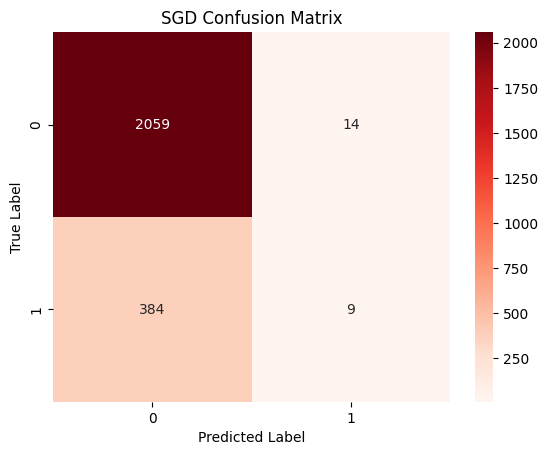

In [92]:
cmatrix(y_test,y_hat_SGD,'SGD')

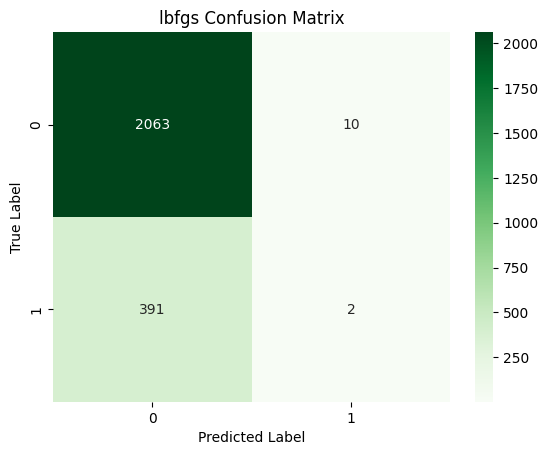

In [94]:
cmatrix(y_test,y_hat_lbfgs, 'lbfgs')

In [36]:
#@title Exploring different models

#importing lazypredict for convenient comparison between different models
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)


In [37]:
#Fit and test the different models
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

 97%|█████████▋| 28/29 [00:27<00:01,  1.29s/it]

[LightGBM] [Info] Number of positive: 1535, number of negative: 8329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 9864, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.155616 -> initscore=-1.691213
[LightGBM] [Info] Start training from score -1.691213


100%|██████████| 29/29 [00:28<00:00,  1.03it/s]


In [38]:
#Print models' metrics
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.68               0.61     0.61      0.72   
QuadraticDiscriminantAnalysis      0.72               0.60     0.60      0.75   
Perceptron                         0.80               0.59     0.59      0.79   
GaussianNB                         0.77               0.58     0.58      0.78   
DecisionTreeClassifier             0.74               0.56     0.56      0.75   
BernoulliNB                        0.78               0.55     0.55      0.77   
LabelPropagation                   0.81               0.55     0.55      0.79   
LabelSpreading                     0.81               0.55     0.55      0.79   
ExtraTreeClassifier                0.74               0.55     0.55      0.75   
BaggingClassifier                  0.82               0.54     0.54      0.79   
KNeighborsClassifier        

{'accuracy': 0.84, 'precision': 0.86, 'recall': 0.97, 'f1': 0.91, 'AUC-ROC': 0.54}


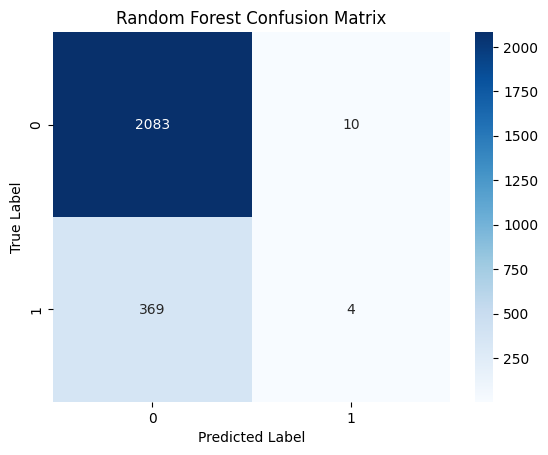

In [39]:
#Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_rf = rf.predict(X_test_scaled)
print(generate_report(y_test, y_pred_rf))
cmatrix(y_test,y_hat_lbfgs, 'Random Forest')